In [15]:
import pandas

go_df = pandas.read_csv('go_values.csv',index_col=0)
c_df = pandas.read_csv('c_values.csv',index_col=0)

In [16]:
go_df.head()

,Executavel,Tam_Tabuleiro,Num_Iteracoes,Num_Threads,Tempo_Conc,Tempo_Pool
0,Go,32,256,1,0.019916,0.019916
1,Go,32,256,2,0.019908,0.014533
2,Go,32,256,4,0.018797,0.013860
3,Go,32,256,8,0.018824,0.015024
4,Go,32,256,16,0.019020,0.014957


In [17]:
c_df.head()

,Executavel,Tam_Tabuleiro,Num_Iteracoes,Num_Threads,Tempo
0,C,32,256,1,0.011106
1,C,32,256,2,0.066422
2,C,32,256,4,0.037318
3,C,32,256,8,0.020515
4,C,32,256,16,0.025672


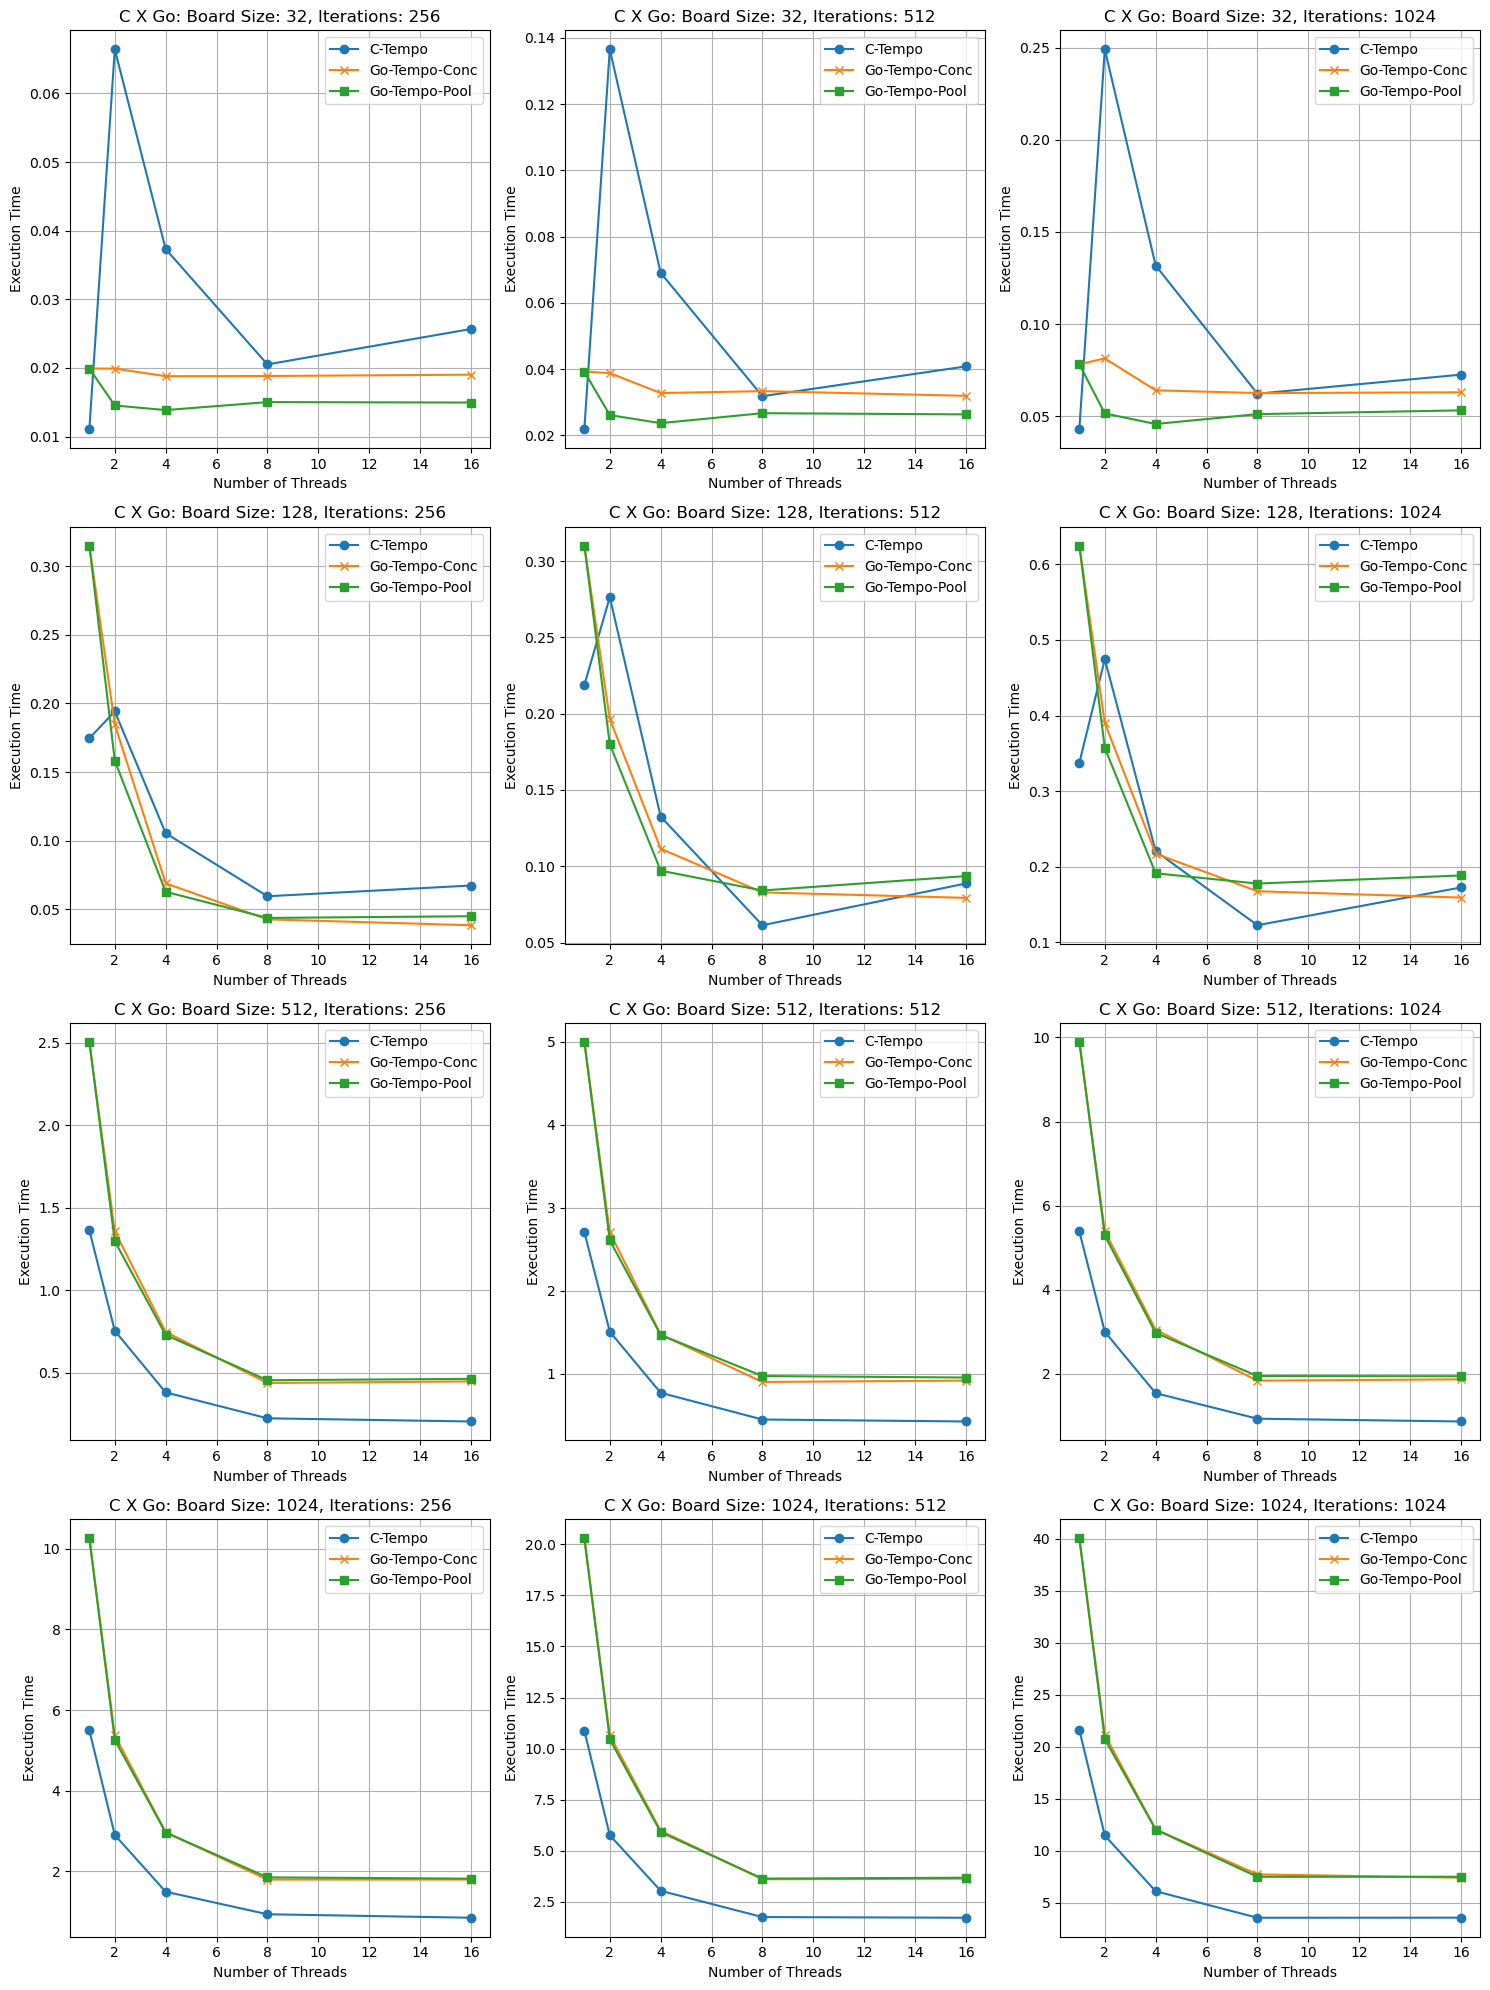

In [18]:
import matplotlib.pyplot as plt

go_grouped = go_df.groupby(['Tam_Tabuleiro','Num_Iteracoes'])
c_grouped = c_df.groupby(['Tam_Tabuleiro','Num_Iteracoes'])

num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.plot(c_group["Num_Threads"], c_group["Tempo"], label="C-Tempo", marker='o')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Conc"], label="Go-Tempo-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Pool"], label="Go-Tempo-Pool", marker='s')
    ax.set_title(f"C X Go: Board Size: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Execution Time")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


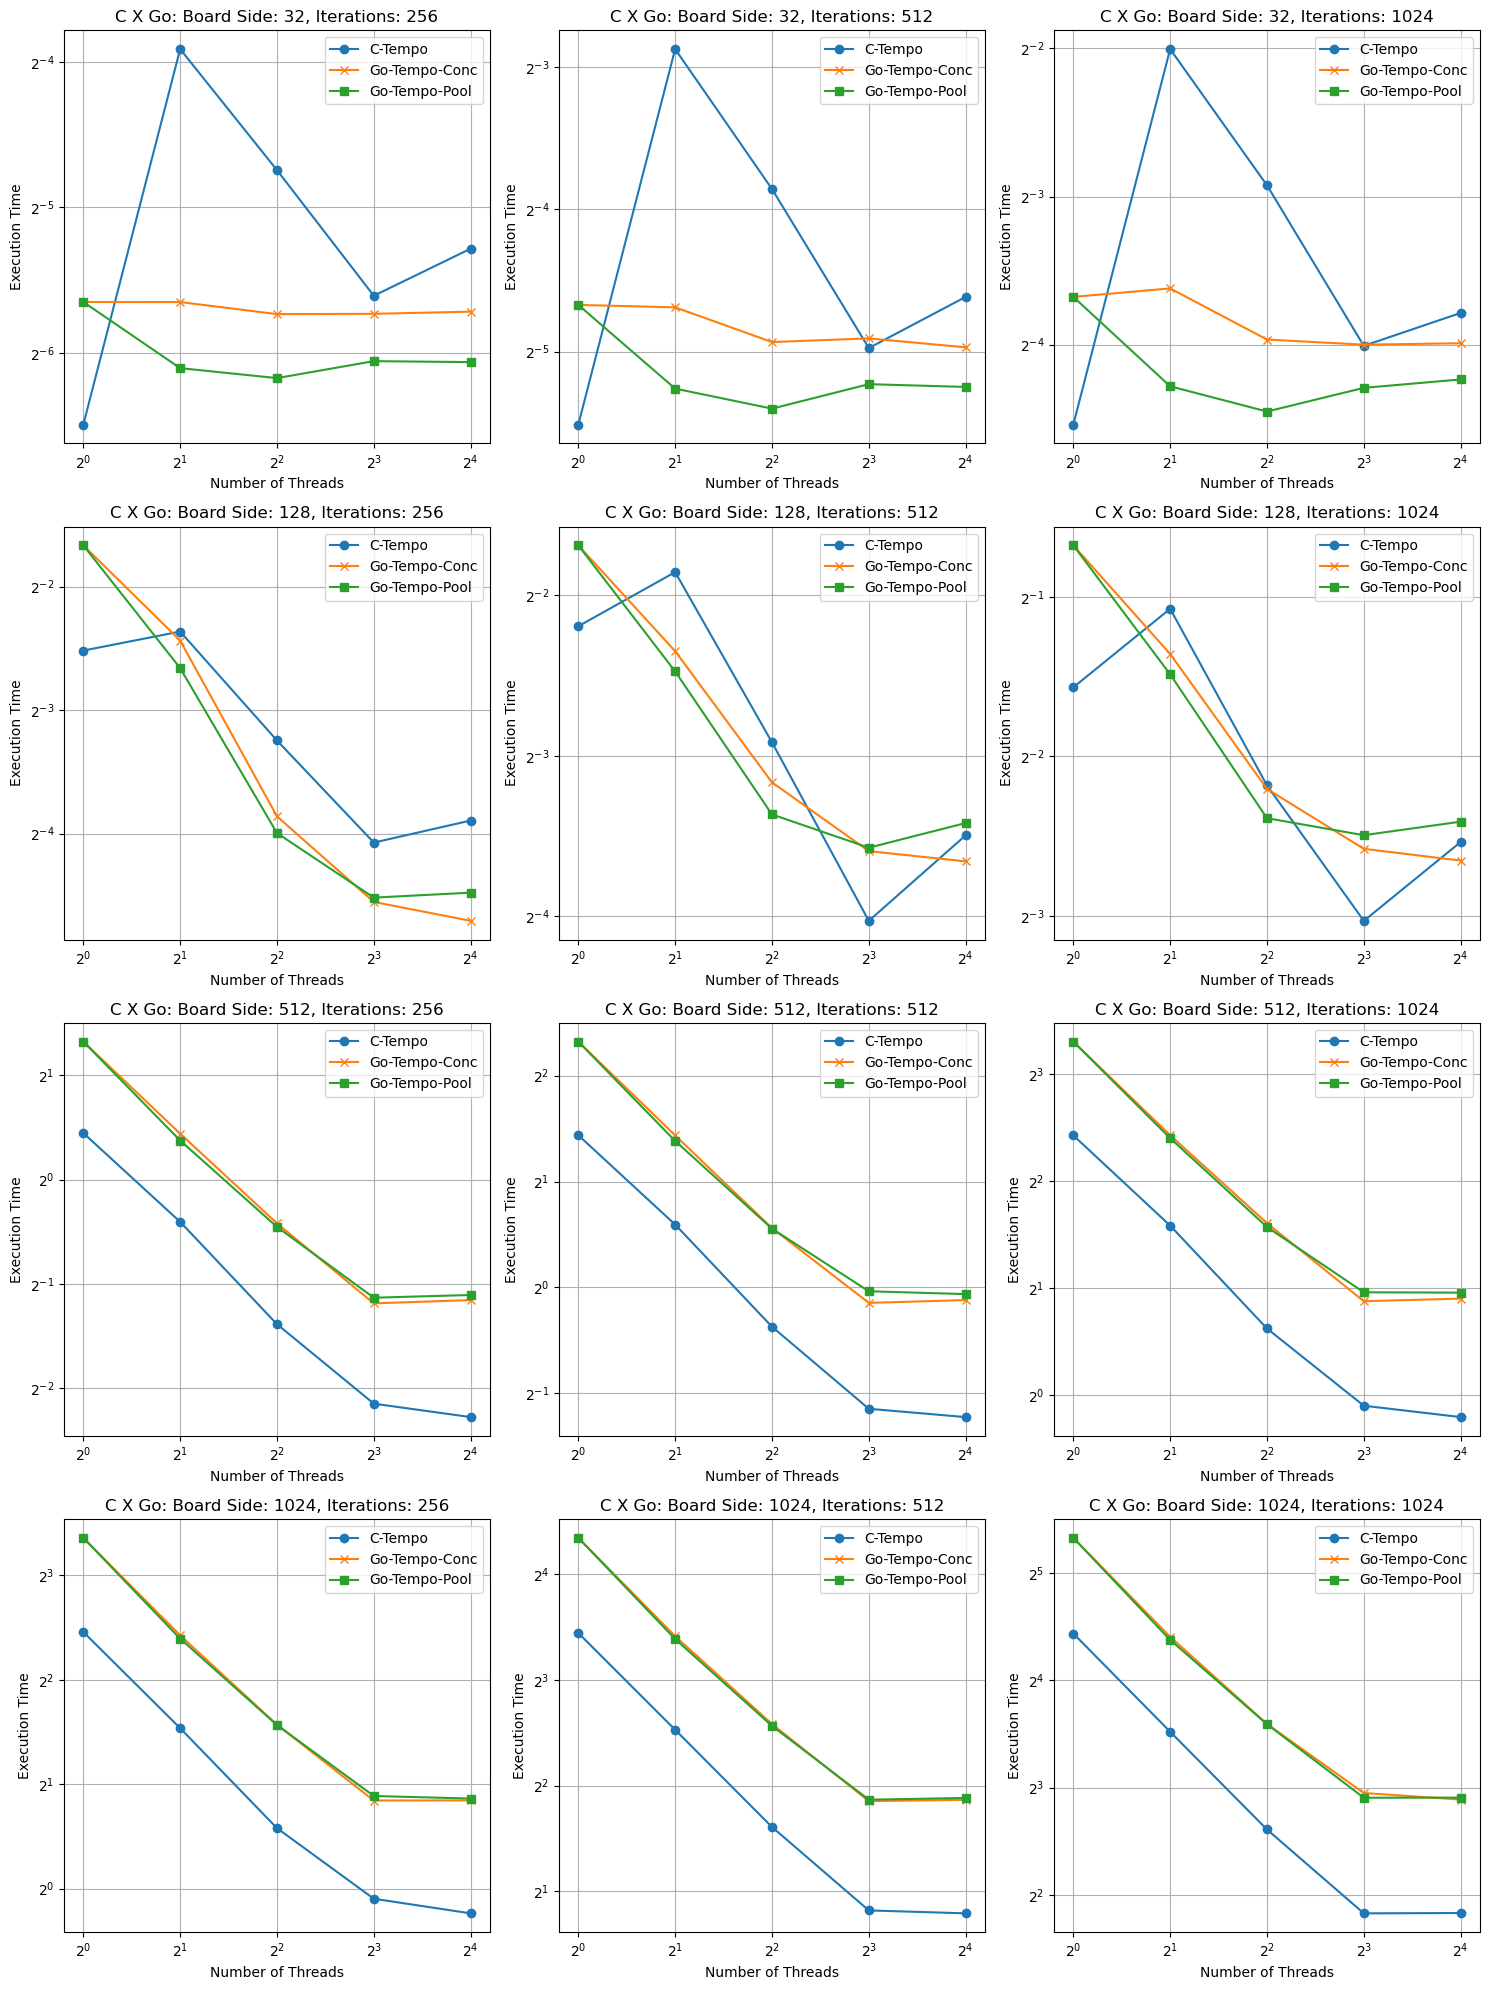

In [19]:
# a mesma coisa log scale
num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.set_xscale('log',base=2)
    ax.set_yscale('log',base=2)
    ax.plot(c_group["Num_Threads"], c_group["Tempo"], label="C-Tempo", marker='o')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Conc"], label="Go-Tempo-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_group["Tempo_Pool"], label="Go-Tempo-Pool", marker='s')
    ax.set_title(f"C X Go: Board Side: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Execution Time")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

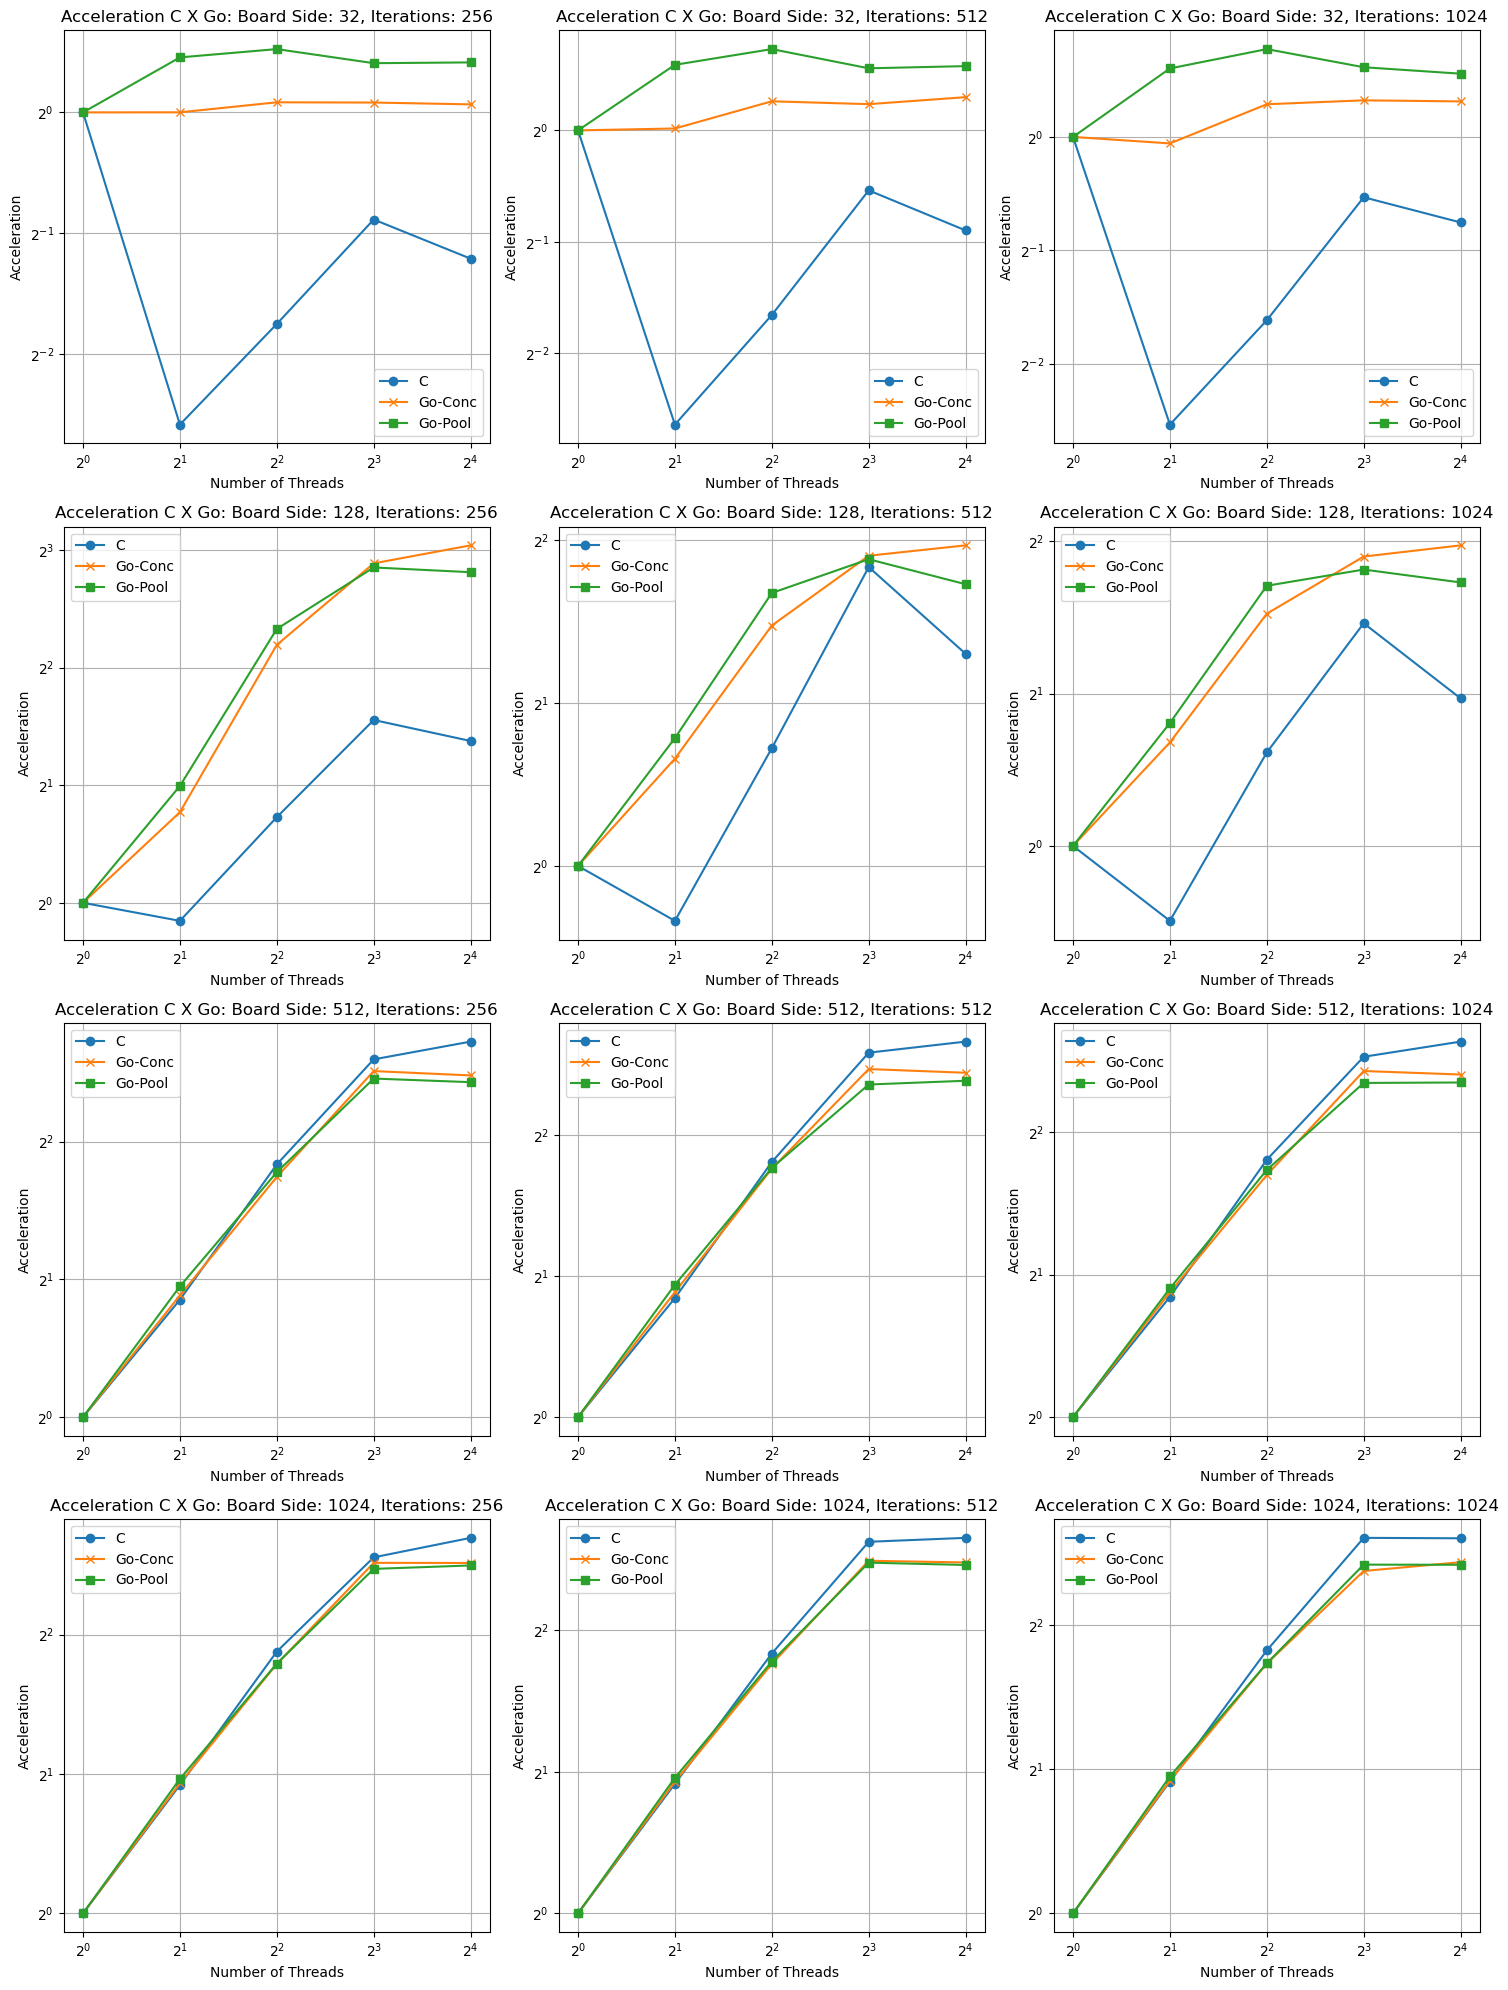

In [20]:
num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.set_xscale('log',base=2)
    ax.set_yscale('log',base=2)
    

    #quando num_threads = 1, tempo conc = tempo pool = tempo seq
    ax.plot(c_group["Num_Threads"], c_group['Tempo'].iloc[0] / c_group["Tempo"], label="C", marker='o')
    ax.plot(go_group["Num_Threads"], go_group['Tempo_Conc'].iloc[0] / go_group["Tempo_Conc"], label="Go-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_group['Tempo_Conc'].iloc[0] / go_group["Tempo_Pool"], label="Go-Pool", marker='s')
    ax.set_title(f"Acceleration C X Go: Board Side: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Acceleration")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

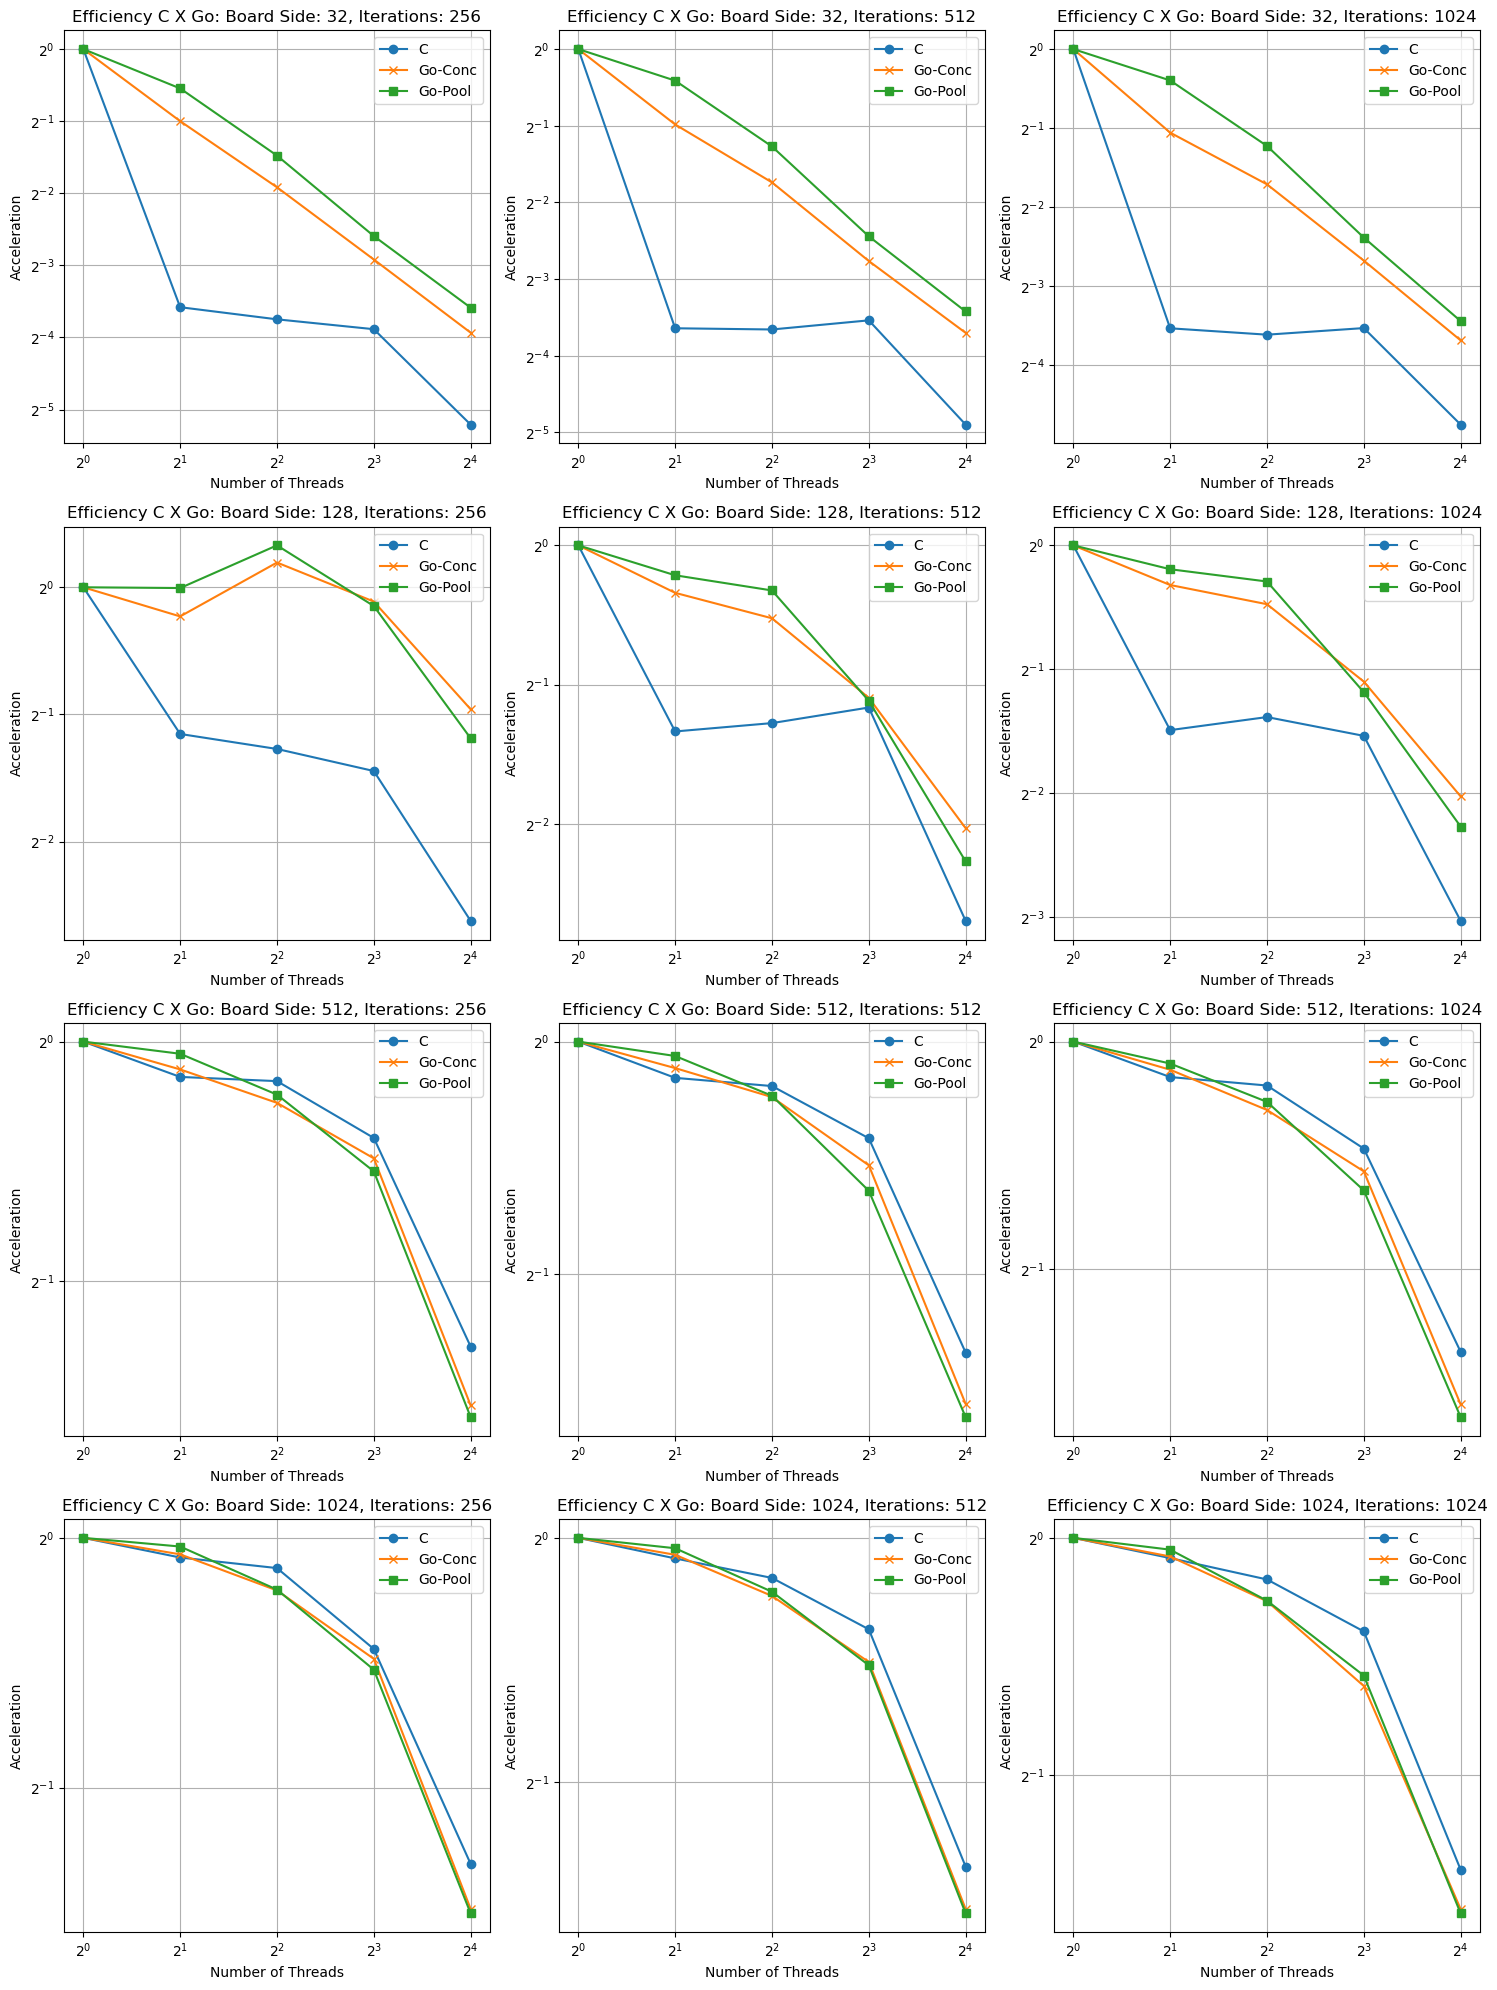

In [21]:
num_plots = len(go_grouped)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

# Adjust figure size based on the number of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration


# Generate subplots
for (ax, (((board_size,iterations),c_group),((_,_), go_group))) in zip(axes, zip(c_grouped,go_grouped)):
    ax.set_xscale('log',base=2)
    ax.set_yscale('log',base=2)
    
    #quando num_threads = 1, tempo conc = tempo pool = tempo seq

    c_eff = (c_group['Tempo'].iloc[0] / c_group["Tempo"]) / c_group["Num_Threads"]
    go_conc_eff = (go_group['Tempo_Conc'].iloc[0] / go_group["Tempo_Conc"]) / go_group["Num_Threads"]
    go_pool_eff = (go_group['Tempo_Conc'].iloc[0] / go_group["Tempo_Pool"]) / go_group["Num_Threads"]


    ax.plot(c_group["Num_Threads"], c_eff, label="C", marker='o')
    ax.plot(go_group["Num_Threads"], go_conc_eff, label="Go-Conc", marker='x')
    ax.plot(go_group["Num_Threads"], go_pool_eff, label="Go-Pool", marker='s')
    ax.set_title(f"Efficiency C X Go: Board Side: {board_size}, Iterations: {iterations}")
    ax.set_xlabel("Number of Threads")
    ax.set_ylabel("Acceleration")

    ax.legend()
    ax.grid(True)



# Hide unused subplots if the number of plots isn't a perfect grid
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()